# Задание 2. Логические методы классификации

1. Задание выполнить в среде Google Colaboratory, сдать в Teams данный файл.
2. Использовать выбранную и закрепленную за вами выборку данных (датасет).
3. Разбить выборку на обучающую и контрольную в пропорциях 80%-20% или 70%-30%.
4. Для алгоритма "Решающее дерево" совместно настроить по минимуму ошибок на обучении и контроле следующие параметры: критерий информативности (criterion), глубина дерева (max_depth).
5. Для алгоритма "Случайный лес" совместно настроить по минимуму ошибок на обучении и контроле следующие параметры: количество деревьев (n_estimators), количество признаков для разделения (max_features). Использовать параметры criterion и max_depth, отобранные для алгоритма "Решающее дерево".
6. Материалы: [Машинное обучение (курс лекций, К.В. Воронцов). Логические методы](http://www.machinelearning.ru/wiki/index.php?title=%D0%9C%D0%B0%D1%88%D0%B8%D0%BD%D0%BD%D0%BE%D0%B5_%D0%BE%D0%B1%D1%83%D1%87%D0%B5%D0%BD%D0%B8%D0%B5_(%D0%BA%D1%83%D1%80%D1%81_%D0%BB%D0%B5%D0%BA%D1%86%D0%B8%D0%B9,_%D0%9A.%D0%92.%D0%92%D0%BE%D1%80%D0%BE%D0%BD%D1%86%D0%BE%D0%B2)#.D0.9B.D0.BE.D0.B3.D0.B8.D1.87.D0.B5.D1.81.D0.BA.D0.B8.D0.B5_.D0.BC.D0.B5.D1.82.D0.BE.D0.B4.D1.8B_.D0.BA.D0.BB.D0.B0.D1.81.D1.81.D0.B8.D1.84.D0.B8.D0.BA.D0.B0.D1.86.D0.B8.D0.B8)

## Выполнил студент

ФИО

Группа

###Выборка данных <...>

*   Предметная область: ...
*   Задача: ...
*   Классы: ...
*   Признаки: ...
*   Объекты: ...


## Библиотеки

In [1]:
import warnings
warnings.filterwarnings("ignore")

In [2]:
import matplotlib.pyplot as plt
from matplotlib.image import imread
from mpl_toolkits import mplot3d
from matplotlib import gridspec
from copy import deepcopy
from mlxtend.plotting import plot_decision_regions
import seaborn as sns
import pandas as pd
from tqdm.notebook import tqdm
from scipy.special import softmax
from scipy.spatial.distance import cdist
import numpy as np
from sklearn import tree
import itertools
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC, SVR
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, roc_auc_score, roc_curve
from sklearn.metrics import auc
from sklearn.model_selection import KFold, ParameterGrid
from sklearn.datasets import make_classification, load_wine, load_boston
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from torchvision import datasets
from torchvision import transforms

## Алгоритм "Решающее дерево". Случайная выборка

In [3]:
# Генерация выборки, разделение её на обучение и контроль

np.random.seed(0)
l = 150
n = 2
X1 = np.array([[-1,-1] + [0]*(n-2)]) + 0.6*np.random.randn(l, n)
X2 = np.array([[1,1] + [0]*(n-2)]) + 0.6*np.random.randn(l, n)

X = np.vstack([X1, X2])
Y = np.hstack([[0]*l, [1]*l])

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, 
                                                    test_size=50, 
                                                    random_state=0)

In [4]:
# Применение алгоритма классификации

# Критерии информативности: энтропийный (entroy) и Джини (gini)
model = DecisionTreeClassifier(criterion='entropy', max_depth=2, random_state=0)
model.fit(X_train, Y_train)

# Accuracy — доля правильных ответов алгоритма
print('Train: ', model.score(X_train, Y_train))
print('Test : ', model.score(X_test, Y_test))
print(classification_report(Y_test, model.predict(X_test)))

Train:  0.984
Test :  0.98
              precision    recall  f1-score   support

           0       1.00      0.96      0.98        25
           1       0.96      1.00      0.98        25

    accuracy                           0.98        50
   macro avg       0.98      0.98      0.98        50
weighted avg       0.98      0.98      0.98        50



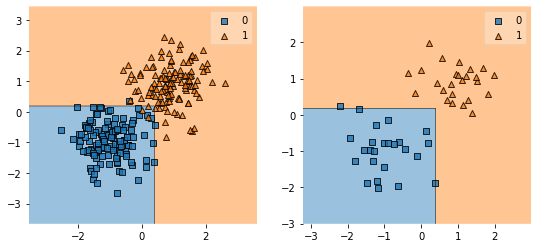

In [5]:
fig, gs = plt.figure(figsize=(9,4)), gridspec.GridSpec(1, 2)

ax = []
for i in range(2):
    ax.append(fig.add_subplot(gs[i]))

plot_decision_regions(X_train, Y_train, model, ax=ax[0])
plot_decision_regions(X_test, Y_test, model, ax=ax[1])

plt.show()

In [6]:
# Текстовое представление дерева

text_representation = tree.export_text(model)
print(text_representation)

|--- feature_1 <= 0.18
|   |--- feature_0 <= 0.40
|   |   |--- class: 0
|   |--- feature_0 >  0.40
|   |   |--- class: 1
|--- feature_1 >  0.18
|   |--- feature_0 <= -0.38
|   |   |--- class: 1
|   |--- feature_0 >  -0.38
|   |   |--- class: 1



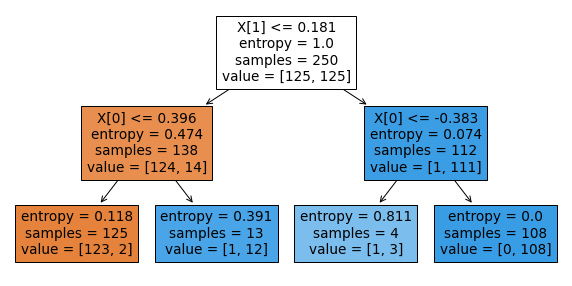

In [7]:
# Графическое представление дерева

fig = plt.figure(figsize=(10,5))
_ = tree.plot_tree(model, filled=True)

In [8]:
# Зависимость результата от глубины дерева

models = []
for depth in range(1, 6):
    model = DecisionTreeClassifier(criterion='entropy', max_depth=depth, random_state=0)
    model.fit(X_train, Y_train)
    models.append(model)

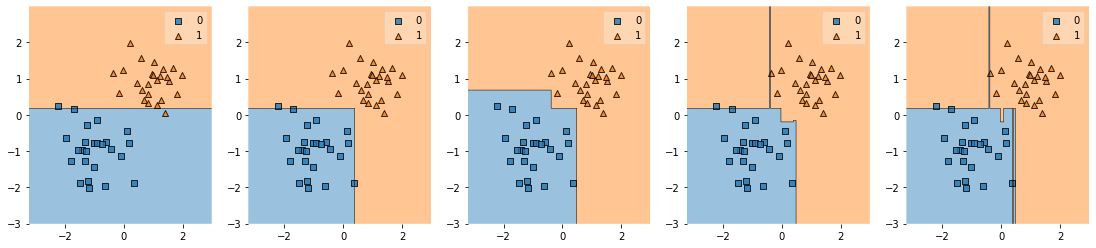

In [9]:
fig, gs = plt.figure(figsize=(19, 4)), gridspec.GridSpec(1, 5)

ax = []
for i in range(5):
    ax.append(fig.add_subplot(gs[i]))

for i, model in enumerate(models):
    plot_decision_regions(X_test, Y_test, model, ax=ax[i])

plt.show()

## Алгоритм "Решающее дерево". Выборка Wine

In [10]:
# Загрузка выборки

data = load_wine()
X = data['data']
Y = data['target']

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, 
                                                    test_size=30, 
                                                    random_state=0)

In [11]:
# Применение алгоритма классификации

# Выбрать лучший критерии информативности: энтропийный (entroy) и Джини (gini)
model = DecisionTreeClassifier(criterion='entropy', max_depth=4, random_state=0)
model.fit(X_train, Y_train)

# Accuracy — доля правильных ответов алгоритма
print('Train: ', model.score(X_train, Y_train))
print('Test : ', model.score(X_test, Y_test))
print(classification_report(Y_test, model.predict(X_test)))

Train:  1.0
Test :  0.9333333333333333
              precision    recall  f1-score   support

           0       1.00      0.89      0.94         9
           1       0.93      0.93      0.93        15
           2       0.86      1.00      0.92         6

    accuracy                           0.93        30
   macro avg       0.93      0.94      0.93        30
weighted avg       0.94      0.93      0.93        30



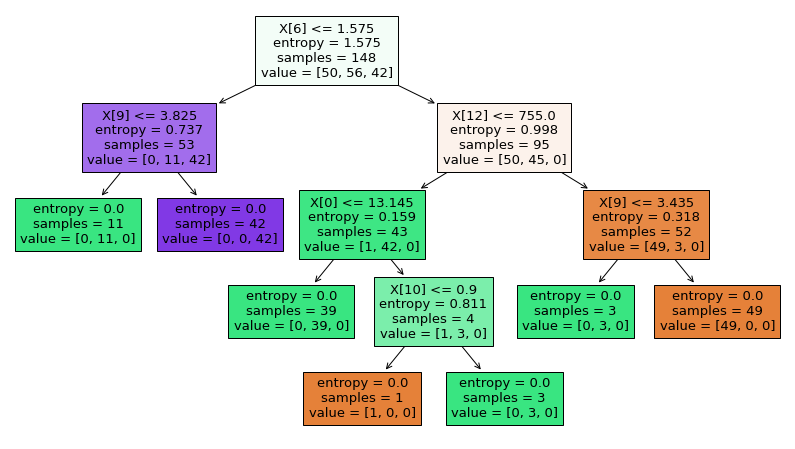

In [12]:
# Графическое представление дерева

fig = plt.figure(figsize=(14,8))
_ = tree.plot_tree(model, filled=True)

### Алгоритм "Случайный лес" (ансамбль деревьев). Выборка Wine

1. Количество деревьев (n_estimators) нужно подбирать, т.к. большое их количество увеличивает качество на обучении, но на контроле, может быть меньше или не меняться вовсе, при этом время обучении возрастает.
2. Важным параметров является количество признаков (max_features), которые участвуют в построении правила разделения. Обычно для классификации используется $\sqrt{n}$, где n – общее количество признаков. Параметр является важным, т.к. при его увеличении деревья становятся похожими друг на друга.
3. Параметр глубина деревьев (max_depth) можно не подбирать, т.к. деревья сами настраивают его. Но если выборка слишком шумная, рекомендуется не использовать слишком глубокие деревья.

In [13]:
# Загрузка выборки

data = load_wine()
X = data['data']
Y = data['target']

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, 
                                                    test_size=30, 
                                                    random_state=0)

In [14]:
# Применение алгоритма классификации

# Критерии информативности: энтропийный (entroy) и Джини (gini)
model = RandomForestClassifier(criterion='entropy', n_estimators=6,
                               max_depth=2, random_state=0)
model.fit(X_train, Y_train)

# Accuracy — доля правильных ответов алгоритма
print('Train: ', model.score(X_train, Y_train))
print('Test : ', model.score(X_test, Y_test))
print(classification_report(Y_test, model.predict(X_test)))

Train:  0.9932432432432432
Test :  0.9666666666666667
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         9
           1       1.00      0.93      0.97        15
           2       0.86      1.00      0.92         6

    accuracy                           0.97        30
   macro avg       0.95      0.98      0.96        30
weighted avg       0.97      0.97      0.97        30



In [15]:
# Зависимость результата от количества деревьев

models = []
scores_train = []
scores_test = []
n_estimators = list(range(1, 20))
for estimators in n_estimators:
    model = RandomForestClassifier(criterion='entropy', n_estimators=estimators,
                                   random_state=0)
    model.fit(X_train, Y_train)
    models.append(model)
    scores_test.append(model.score(X_test, Y_test))
    scores_train.append(model.score(X_train, Y_train))

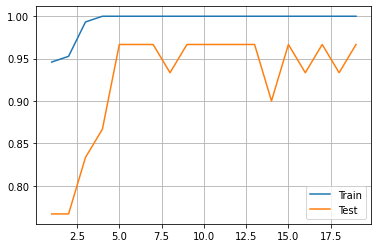

In [16]:
plt.plot(n_estimators, scores_train, label='Train')
plt.plot(n_estimators, scores_test, label='Test')

plt.legend(loc='best')
plt.grid()
plt.show()

In [17]:
# Зависимость качества от числа признаков при расщеплении

models = []
scores_train = []
scores_test = []
max_features = list(range(1, 13))
for features in max_features:
    model = RandomForestClassifier(criterion='entropy', n_estimators=6, 
                                   max_features=features, random_state=0)
    model.fit(X_train, Y_train)
    models.append(model)
    scores_test.append(model.score(X_test, Y_test))
    scores_train.append(model.score(X_train, Y_train))

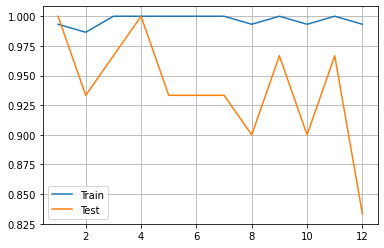

In [18]:
plt.plot(max_features, scores_train, label='Train')
plt.plot(max_features, scores_test, label='Test')

plt.legend(loc='Best')
plt.grid()
plt.show()

In [19]:
# Зависимость результата от глубины деревьев

models = []
scores_train = []
scores_test = []
current_depth = []
max_depth = list(range(1, 10))
for depth in max_depth:
    model = RandomForestClassifier(criterion='entropy', n_estimators=6,
                                   max_depth=depth, random_state=0)
    model.fit(X_train, Y_train)
    models.append(model)
    scores_test.append(model.score(X_test, Y_test))
    scores_train.append(model.score(X_train, Y_train))
    current_depth.append(model.estimators_[0].get_depth()/depth)

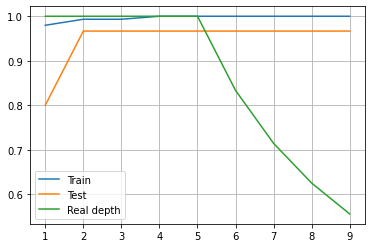

In [20]:
plt.plot(max_depth, scores_train, label='Train')
plt.plot(max_depth, scores_test, label='Test')
plt.plot(max_depth, current_depth, label='Real depth')

plt.legend(loc='Best')
plt.grid()
plt.show()

---


## Заключение

### 1. Алгорим "Решающее дерево"

* Критерий информативности: criterion=...
* Глубина дерева: max_depth=...
* Качество на обучающей выборке: ...
* Качество на контрольной выборке: ...


### 2. Алгоритм "Случайный лес"

* Количество деревьев: n_estimators=...
* Признаки для разделения: max_features=...
* Качество на обучающей выборке: ...
* Качество на контрольной выборке: ...

### 3. Вывод

Лучший результат продемонстрировал метод ...